## 作业3 (上机作业，线性回归模型的数值仿真)
设$y = h_{\theta}(\mathbf{x}) = a + bx + \epsilon$ 是一个直线方程，其中𝜀 是高斯噪声。请采100个输入样本，计算出相应的输出样本，并利用线性回归模型拟合这些样本，利用最小二乘求解。可视化这两类算法的回归的结果。

In [7]:
import matplotlib
print(matplotlib.matplotlib_fname())

/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


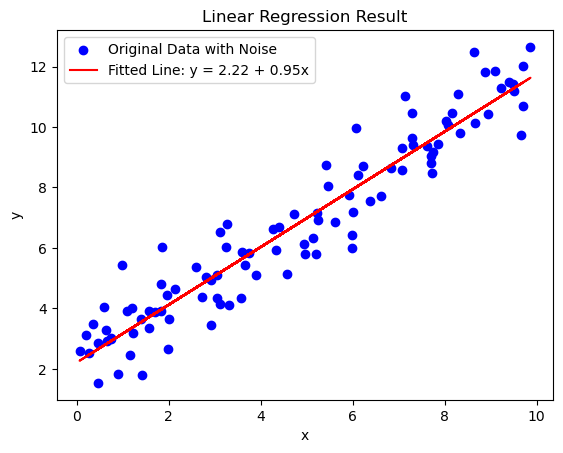

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# 1. 生成100个输入样本
x = np.random.rand(100, 1) * 10  # 随机生成在0-10范围内的100个数

# 2. 根据方程 y = a + bx + epsilon 计算输出
# 生日： 12月
a = 2
b = 1
epsilon = np.random.randn(100, 1)  # 生成高斯噪声
y = a + b*x + epsilon

# 3. 使用线性回归模型拟合这些样本
reg = LinearRegression().fit(x, y)

# 4. 获取拟合的参数
a_hat = reg.intercept_[0]
b_hat = reg.coef_[0][0]

# 5. 可视化原始数据和回归结果
plt.scatter(x, y, color='blue', label='Original Data with Noise')
plt.plot(x, reg.predict(x), color='red', label=f'Fitted Line: y = {a_hat:.2f} + {b_hat:.2f}x')
plt.title("Linear Regression Result")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

---
# 作业4(上机作业，线性回归模型)

regress_data1.csv是人口数据集， 其中有1个输入变量(人口数量)和输出变量(收益)。并利用线性回归 模型拟合人口数据样本，并可视化回归的结果。

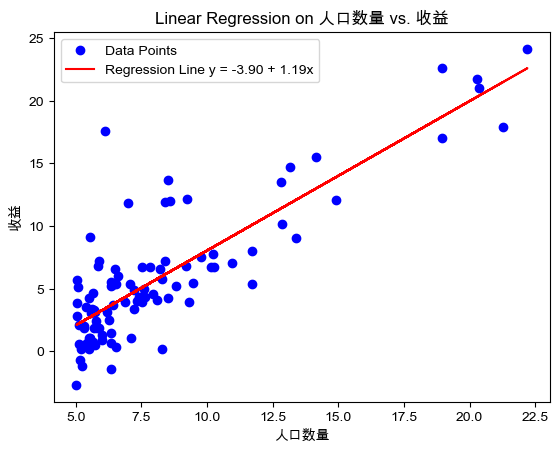

In [15]:
import pandas as pd
plt.rcParams["font.family"] = 'Arial Unicode MS'

# 1. 读取数据
data = pd.read_csv('regress_data1.csv')
x = data[['人口数量']].values
y = data[['收益']].values

# 2. 使用线性回归模型拟合数据
reg = LinearRegression().fit(x, y)

# 获取拟合的参数
a = reg.intercept_[0]
b = reg.coef_[0][0]
line_expression = f"y = {a:.2f} + {b:.2f}x"

# 3. 可视化数据和拟合结果
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, reg.predict(x), color='red', label=f'Regression Line {line_expression}')
plt.xlabel('人口数量')
plt.ylabel('收益')
plt.title('Linear Regression on 人口数量 vs. 收益')
plt.legend()
plt.show()

---
## 作业5 (上机作业，多项式拟合)

在此作业中，将利用多输入的线性回归模型实现多项式的拟合。使用最小二乘法进行求解，并可视化拟合的结果。

**实值输入**: $x$  
**真实的函数**: $\sin(2\pi x)$  
**观测值**: $t = \sin(2\pi x) + \text{Gaussian Noise}$

训练集合，其中包括 $N$ 个样本 $(x(n), t(n))$，其中 $n = 1, \dots, N$.

In [16]:
import scipy as sp
from scipy.optimize import leastsq
%matplotlib inline

In [17]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p) 
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

numpy.poly1d([1,2,3]) 生成 $1x^2+2x^1+3x^0$

In [18]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M 为多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.03592675]
Fitting Parameters: [-1.42812722  0.74999037]
Fitting Parameters: [ 23.37180975 -34.97847966  11.79437152  -0.04618553]
Fitting Parameters: [-7.07461242e+01  1.75250163e+02 -1.27700143e+02  1.75956308e+01
  5.64440314e+00  1.50652877e-02]
Fitting Parameters: [ 1.15141329e+03 -4.02043967e+03  5.45386951e+03 -3.60066102e+03
  1.20244274e+03 -2.05650449e+02  1.90949855e+01  3.50950103e-03]
Fitting Parameters: [ 1.85741444e+04 -8.64100748e+04  1.70438508e+05 -1.85364266e+05
  1.20752920e+05 -4.77148770e+04  1.09897004e+04 -1.33568503e+03
  6.96996411e+01  1.30018919e-03]


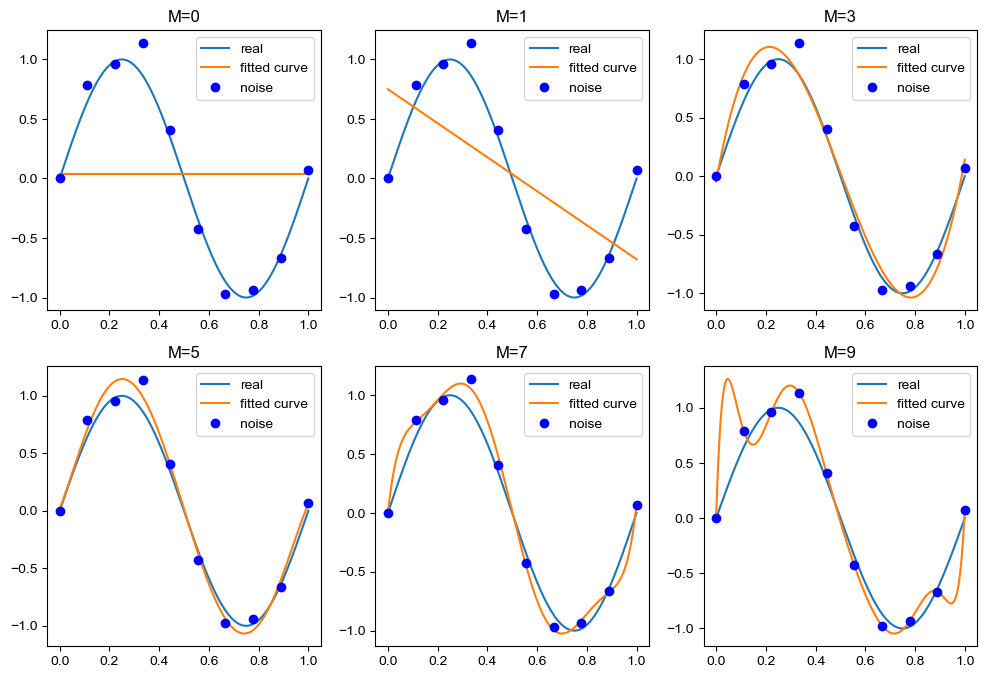

In [20]:
plt.figure(figsize=(12, 8))
for index, M in enumerate([0, 1, 3, 5,7, 9]):
    plt.subplot(2, 3, index+1)
    fitting(M)
    plt.title(f"M={M}")

plt.show()